In [2]:
import numpy as np
from sklearn.metrics import mean_squared_error

# Given data points
data = {
    1: 2, 0.8: 3, 2: 2.5, 2.5: 1, 3: 2.3, 4: 2.8, 4.2: 1.5, 
    6: 2.6, 6.3: 3.5, 7: 4, 8: 3.5, 8.2: 5, 9: 4.5
}

# Decision threshold
threshold = 5.0

# Split the data into two groups based on the decision threshold
group1 = {x: y for x, y in data.items() if x <= threshold}
group2 = {x: y for x, y in data.items() if x > threshold}

# Calculate the MSE for each group
mse_group1 = mean_squared_error(list(group1.values()), [np.mean(list(group1.values()))] * len(group1))
mse_group2 = mean_squared_error(list(group2.values()), [np.mean(list(group2.values()))] * len(group2))

# Compute the overall MSE by averaging the MSEs of the two groups
overall_mse = (mse_group1 + mse_group2) / 2

overall_mse_root = mean_squared_error(list(data.values()), [np.mean(list(data.values()))] * len(data))

print(f"Overall MSE at Root: {overall_mse_root}")
print(f"Overall MSE at Depth 1: {overall_mse}")


Overall MSE at Root: 1.2223668639053253
Overall MSE at Depth 1: 0.5162840136054421


In [17]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor

housing = fetch_california_housing()

X = housing.data[:, housing.feature_names.index("MedInc")]
y = housing.target

class Node:
    def __init__(self, depth, max_depth):
        self.depth = depth
        self.max_depth = max_depth
        self.feature_index = None
        self.threshold = None
        self.value = None
        self.left = None
        self.right = None
    
    def fit(self, X, y):
        if self.depth == self.max_depth or len(np.unique(y)) == 1:
            self.value = np.mean(y)
            return
        
        num_features = X.shape[1]
        best_gain = 0
        best_feature_index = None
        best_threshold = None
        
        for feature_index in range(num_features):
            thresholds = np.unique(X[:, feature_index])
            for threshold in thresholds:
                y_left = y[X[:, feature_index] <= threshold]
                y_right = y[X[:, feature_index] > threshold]
                if len(y_left) == 0 or len(y_right) == 0:
                    continue
                
                gain = self.calculate_gain(y, y_left, y_right)
                
                if gain > best_gain:
                    best_gain = gain
                    best_feature_index = feature_index
                    best_threshold = threshold
        
        if best_gain == 0:
            self.value = np.mean(y)
            return
        
        self.feature_index = best_feature_index
        self.threshold = best_threshold
        
        X_left = X[X[:, self.feature_index] <= self.threshold]
        y_left = y[X[:, self.feature_index] <= self.threshold]
        X_right = X[X[:, self.feature_index] > self.threshold]
        y_right = y[X[:, self.feature_index] > self.threshold]
        
        self.left = Node(self.depth + 1, self.max_depth)
        self.right = Node(self.depth + 1, self.max_depth)
        self.left.fit(X_left, y_left)
        self.right.fit(X_right, y_right)
    
    def calculate_gain(self, y, y_left, y_right):
        mse_parent = np.mean((y - np.mean(y))**2)
        mse_left = np.mean((y_left - np.mean(y_left))**2)
        mse_right = np.mean((y_right - np.mean(y_right))**2)
        return mse_parent - (len(y_left) / len(y)) * mse_left - (len(y_right) / len(y)) * mse_right
    
    def predict(self, x):
        if self.value is not None:
            return self.value
        elif x[self.feature_index] <= self.threshold:
            return self.left.predict(x)
        else:
            return self.right.predict(x)

class RegressionTree:
    def __init__(self, max_depth=2):
        self.root = Node(depth=0, max_depth=max_depth)
    
    def fit(self, X, y):
        self.root.fit(X, y)
    
    def predict(self, X):
        return np.array([self.root.predict(x) for x in X])
    
custom_tree = RegressionTree(max_depth=2)
custom_tree.fit(X.reshape(-1, 1), y)

regr_1 = DecisionTreeRegressor(criterion='squared_error', max_depth=1)
regr_1.fit(X.reshape(-1, 1), y)

y_pred_custom = custom_tree.predict(X.reshape(-1, 1))
y_pred_sklearn = regr_1.predict(X.reshape(-1, 1))

mse_custom = mean_squared_error(y, y_pred_custom)
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"MSE for Custom Tree: {mse_custom}")
print(f"MSE for DecisionTreeRegressor: {mse_sklearn}")

MSE for Custom Tree: 0.7360617054857719
MSE for DecisionTreeRegressor: 0.9187989138801309


Training accuracy: 0.9916666666666667
Test accuracy: 1.0


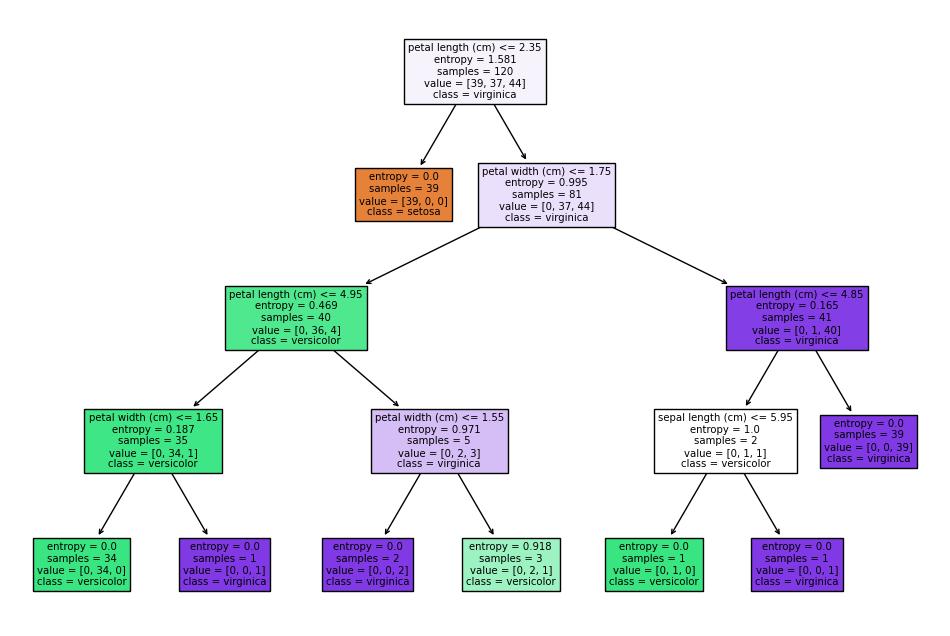

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt


iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

class_tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
class_tree.fit(X_train, y_train)

y_train_pred = class_tree.predict(X_train)
y_test_pred = class_tree.predict(X_test)

y_train_acc = accuracy_score(y_train, y_train_pred)
y_test_acc = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {y_train_acc}")
print(f"Test accuracy: {y_test_acc}")

class_names_list = iris.target_names.tolist()

plt.figure(figsize=(12, 8))
tree.plot_tree(class_tree, feature_names=iris.feature_names, class_names=class_names_list, filled=True)
plt.show()